In [2]:
import preprocessing
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_train, y_train, X_test, y_test = preprocessing.data_loader()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)   

before drop NaNs
(4446966, 42)
after drop NaNs
(4446965, 42)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# PCA Variance Plot

[0, 0.15836132924464494, 0.2418566921996102, 0.31535840469877896, 0.3620930755512717, 0.3968329595808998, 0.42781742345741386, 0.4576174134538138, 0.48650081638262516, 0.514230390665583, 0.5412678202996022, 0.5679845088677564, 0.5935613546753193, 0.6187282588251733, 0.6437387391544909, 0.668747117285997, 0.6937532883357154, 0.7187583744939319, 0.7437577947895428, 0.768750764792236, 0.79347056023827, 0.8172743501216627, 0.8396583239692138, 0.8608234711004559, 0.8807390039000459, 0.9000587620538523, 0.9178623354989079, 0.9323719327332981, 0.9464136242265808, 0.9597704220033103, 0.9707920603369522, 0.9808033469032661, 0.9883033054476993, 0.9934449918255353, 0.9966085304966984, 0.9986353566925775, 0.9992526504491335, 0.9998449540694079, 0.9999632171478274, 1.0]


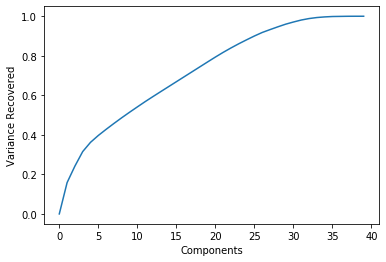

In [12]:
pca = PCA()
pca.fit(X_train)
total = 0
arr = []
for val in pca.explained_variance_ratio_:
    arr.append(total)
    total+= val
print(arr)
plt.plot(arr)
plt.xlabel('Components')
plt.ylabel('Variance Recovered')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
from sklearn import random_projection

# Random Projection Accuracy Plot

In [25]:
components = np.linspace(2,38,19)
rmses = []
maes = []
for comp in components:
    transformer = random_projection.GaussianRandomProjection(n_components=int(comp))
    transformer.fit(X_train)
    columns = ['randomProj_%i' % i for i in range(transformer.components_.shape[0])]
    train_df = pd.DataFrame(transformer.transform(X_train), columns=columns, index=X_train.index)
    test_df = pd.DataFrame(transformer.transform(X_test), columns=columns, index=X_test.index)
    model = LinearRegression()
    model.fit(train_df, y_train)
    y_pred = model.predict(test_df)
    rmse = np.sqrt(np.mean((y_pred - y_test.values)**2))
    rmses.append(rmse)
    maes.append(mae(y_test, y_pred))

[0.26282775050231694, 0.2623298852149139, 0.2370137980999416, 0.2288579093448051, 0.2018368862099044, 0.2419052483193463, 0.19732120914383186, 0.18948612734342174, 0.16949332046247478, 0.199590444604538, 0.1827679678482734, 0.15197982420234937, 0.16012365786532265, 0.16152758554812874, 0.1630989165687491, 0.13231801802123902, 0.12519601860416496, 0.1263548533273316, 0.12382141185056507]


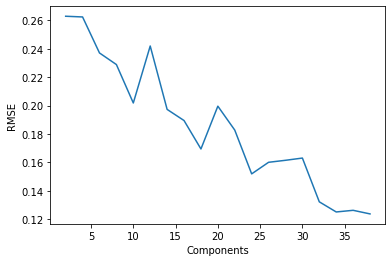

In [26]:
print(rmses)
plt.plot(components, rmses)
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.show()

[0.22061934342076173, 0.22078114951972339, 0.1915551948071322, 0.18565645221596255, 0.16079759862734827, 0.1966804673077731, 0.14822704685421006, 0.14049401406843803, 0.12978116285277969, 0.15822064118165494, 0.1389041491123745, 0.11383090064034797, 0.1216649119361378, 0.12252865611388206, 0.12371631877418096, 0.09763871511348633, 0.09183658180132812, 0.09254493894165532, 0.09067712703833133]


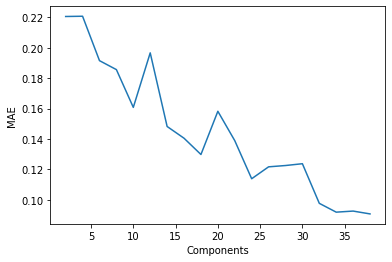

In [27]:
print(maes)
plt.plot(components, maes)
plt.xlabel('Components')
plt.ylabel('MAE')
plt.show()

# PCA Accuracy Plot

In [30]:
components = np.linspace(2,38,19)
rmses = []
maes = []
for comp in components:
    pca = PCA(n_components=int(comp))
    pca.fit(X_train)
    columns = ['pca_%i' % i for i in range(pca.components_.shape[0])]
    train_df = pd.DataFrame(pca.transform(X_train), columns=columns, index=X_train.index)
    test_df = pd.DataFrame(pca.transform(X_test), columns=columns, index=X_test.index)
    model = LinearRegression()
    model.fit(train_df, y_train)
    y_pred = model.predict(test_df)
    rmse = np.sqrt(np.mean((y_pred - y_test.values)**2))
    rmses.append(rmse)
    maes.append(mae(y_test, y_pred))

[0.2264338423805608, 0.19996035373972976, 0.19082040228401706, 0.1830062678490821, 0.18275623419373016, 0.17695855531278634, 0.1784515802791165, 0.1780713955149404, 0.17798584119215993, 0.17804447253240765, 0.17716269359888617, 0.16484383838520292, 0.15511227133813693, 0.15262913730654715, 0.1494740425152172, 0.1392461637708768, 0.1283146311276729, 0.12602901102905387, 0.1231564773802605]


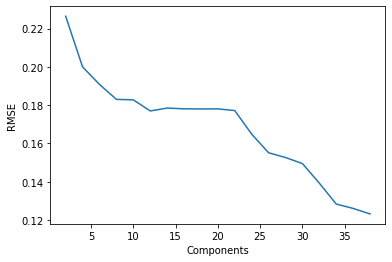

In [31]:
print(rmses)
plt.plot(components, rmses)
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.show()

[0.1865555866775669, 0.16192912327864145, 0.1527733747510784, 0.14583367996076288, 0.145535818241303, 0.13906939902111395, 0.14049879635687126, 0.14034758603761427, 0.1402755541928318, 0.13995090936091698, 0.13964760810485904, 0.12866888820416308, 0.11838567021894852, 0.11652967799327006, 0.11407653489620247, 0.10381400929781974, 0.0934806749915604, 0.09258972394079545, 0.09014651196311665]


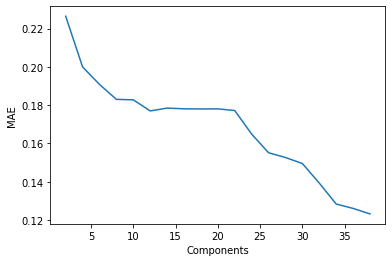

In [32]:
print(maes)
plt.plot(components, rmses)
plt.xlabel('Components')
plt.ylabel('MAE')
plt.show()

# Base Linear Regression

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(np.mean((y_pred - y_test.values)**2))
print("RMSE: " + str(rmse))
print("MAE: " + str(mae(y_test, y_pred)))

RMSE: 406672843.5436245
MAE: 247891853.3140366
